In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from IPython.display import display, HTML
    from autosklearn.classification import AutoSklearnClassifier
from pathlib import Path
import pickle

In [ ]:
upstream = ['get-data']
product = None

In [ ]:
df = pickle.loads(Path(upstream['get-data']['df']).read_bytes())
train = pickle.loads(Path(upstream['get-data']['train']).read_bytes())

## Bespoke EDA

In [14]:
## Check for duplicates in the dataset
df.duplicated().sum()

0

In [15]:
## Check for null values 
df.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

#### **EDA Question 1 ::**
### An overview of the data (number of records, fields and their data types, for both the train and test datasets

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


> The data has 12 features and 1 target variable. The train dataset has 614 records while the test dataset has 367 records.

> The datatypes are as shown below : 

**Loan_ID**              - string  
**Gender**               - string     
**Married**              - string     
**Dependents**           - string      
**Education**            - string     
**Self_Employed**        - string     
**ApplicantIncome**      - integer    
**CoapplicantIncome**    - float     
**LoanAmount**           - float   
**Loan_Amount_Term**     - float     
**Credit_History**       - float     
**Property_Area**        - string   
**Loan_Status** (Target Feature) - string

In [17]:
## Display some summary statics for the numerical columns
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


#### **EDA Question 2 ::**

#### What data quality issues exist in both train and test? 

> 1) Some of the fields should be categorical but instead are in string format 

> 2) Many columns have missing values ie `Gender`, `Married`, `Dependents`, `Self_Employed`, `Loan_Amount`, `Loan_Amount_Term`, `Credit_History`

#### **EDA Question 3 ::**

### How do the the loan statuses compare? i.e. what is the distrubition of each?
> 68.7% of the loans are not likely to be defaulted on as the applicants are credit worthy while 31.3% are likely to be defaulted on and thus should not be approved


In [18]:
## Question 3 ::
train['Loan_Status'].value_counts(normalize=True,dropna=False)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

#### **EDA Question 4 ::**
 
#### How do women and men compare when it comes to defaulting on loans in the historical dataset?
> In the historical data, 30.67% of the men defaulted on their loans while 33.04% of the women defaulted on their loans


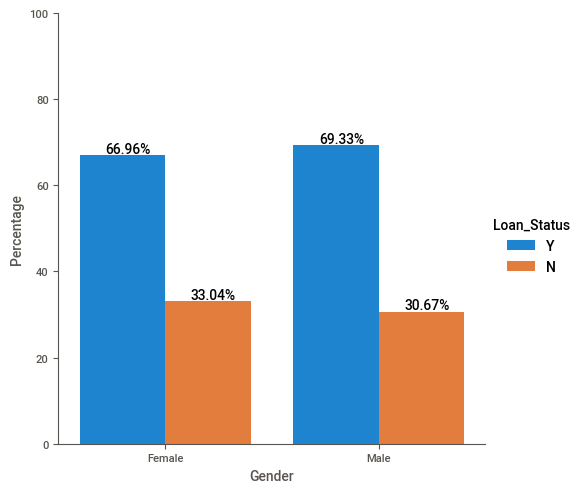

In [19]:
## Question 4::
plot_df = pd.DataFrame(train.groupby('Gender')['Loan_Status'].value_counts(normalize=True)*100)
plot_df.columns = ['Percentage']
plot_df = plot_df.reset_index()
g = sns.catplot(data=plot_df, x='Gender', y='Percentage', hue='Loan_Status', kind='bar')
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x()+.12
    txt_y = p.get_height()+.5
    g.ax.text(txt_x,txt_y,txt)

#### **EDA Question 5 ::**

### How many of the loan applicants have dependents based on the historical dataset?
> In the historical data, 269 of the 614 loan applicants have dependents, which represents  43.8% of the applicants


In [20]:
##Question 5::
(train['Dependents']!='0').value_counts(normalize=True)
#train['Dependents'].value_counts()

False    0.561889
True     0.438111
Name: Dependents, dtype: float64

#### **EDA Question 6 ::**
### How do the incomes of those who are employed compare to those who are self employed based on the historical dataset? 
> Loan applicants who are self employed have a mean income of 5050 while those who are not self employed earn a mean income of 7380. The median income for loan applicants who are self employed is 3705.5 while the median for those who are not self employed is 5809


In [21]:
## Question 6::
print("\n\n\tMedian applicant incomes by Type of Employment:")
display(pd.DataFrame(train.groupby(['Self_Employed'])['ApplicantIncome'].median()))

print("\n\n\tMean applicant incomes by Type of Employment:")
display(pd.DataFrame(train.groupby(['Self_Employed'])['ApplicantIncome'].mean()))



	Median applicant incomes by Type of Employment:


,ApplicantIncome
Self_Employed,
No,3705.5
Yes,5809.0




	Mean applicant incomes by Type of Employment:


,ApplicantIncome
Self_Employed,
No,5049.748000
Yes,7380.817073


#### **EDA Question 7 ::**

### Are applicants with a credit history more likely to default than those who do not have one?
> Applicants without credit history are much more likely to default on loans than applicants with a credit history. While 92.13% of the loans by applicants without credit history were defaulted on, only 20.42% of the loans by applicants with credit history were defaulted on. 


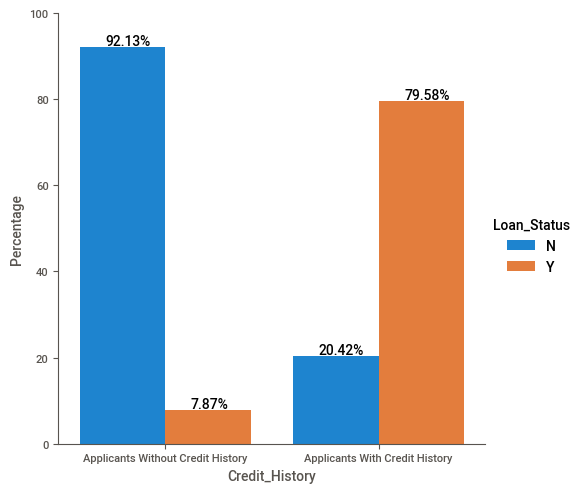

In [22]:
## Question 7 ::
plot_df2 = pd.DataFrame(train.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True)*100)
plot_df2.columns = ['Percentage']
plot_df2 = plot_df2.reset_index()
g = sns.catplot(data=plot_df2, x='Credit_History', y='Percentage', hue='Loan_Status', kind='bar')
g.ax.set_ylim(0,100)
g.set_xticklabels(['Applicants Without Credit History', 'Applicants With Credit History'])
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x()+.12
    txt_y = p.get_height()+.5
    g.ax.text(txt_x,txt_y,txt)

#### **EDA Question 8 ::**

### Is there a correlation between the applicant's income and the loan amount they applied for? 
> Yes, there is a significant positive correlation between an applicant's income and the loan amount they apply for, meaning an applicant with high income is likely to apply for a large loan amount

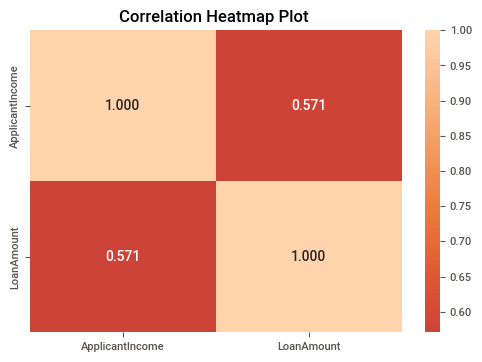

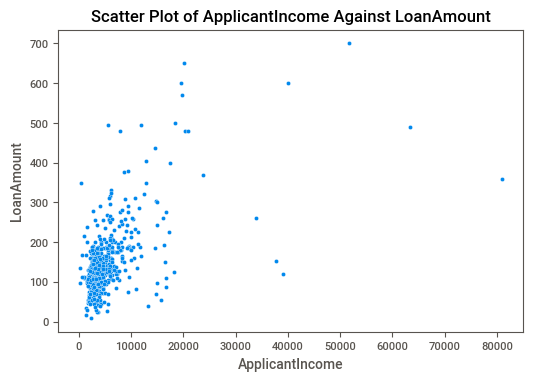

In [23]:
## Question 8 ::
#display(train[['ApplicantIncome', 'LoanAmount']].corr())
sns.heatmap(train[['ApplicantIncome', 'LoanAmount']].corr(), annot=True, fmt='.3f', center=0)
plt.title("Correlation Heatmap Plot ")
plt.show()

sns.scatterplot(data=train, x='ApplicantIncome', y='LoanAmount');
plt.title("Scatter Plot of ApplicantIncome Against LoanAmount")
plt.show()

##Autosklearn  Auto ML


In [24]:
feature_columns = train.columns[1:-1]
print(feature_columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [25]:
## Input data with feature columns 
X = train[feature_columns].copy()

## Convert categorical features to 'category' type
categorical_columns = ['Gender', 'Married','Dependents', 'Education', 'Self_Employed', 'Property_Area']
X[categorical_columns] = X[categorical_columns].astype('category')
X.dtypes

Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area        category
dtype: object

In [26]:
## label encode target
y = train['Loan_Status'].map({'N':0,'Y':1}).astype(int)

## train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# train
autoML = AutoSklearnClassifier(time_left_for_this_task=2*30, per_run_time_limit=30, n_jobs=8) # imposing a 1 minute time limit on this
autoML.fit(X_train, y_train)

# predict
predictions_autoML = autoML.predict(X_test)

In [28]:
print('autoML Model Accuracy:', accuracy_score(predictions_autoML, y_test))

autoML Model Accuracy: 0.7967479674796748


In [29]:
print(confusion_matrix(predictions_autoML, y_test))

[[19  1]
 [24 79]]


In [ ]:
Path(product['X']).parent.mkdir(exist_ok=True, parents=True)
Path(product['X']).write_bytes(pickle.dumps(X))

Path(product['X_train']).parent.mkdir(exist_ok=True, parents=True)
Path(product['X_train']).write_bytes(pickle.dumps(X_train))

Path(product['categorical_columns']).parent.mkdir(exist_ok=True, parents=True)
Path(product['categorical_columns']).write_bytes(pickle.dumps(categorical_columns))

Path(product['y']).parent.mkdir(exist_ok=True, parents=True)
Path(product['y']).write_bytes(pickle.dumps(y))

Path(product['y_train']).parent.mkdir(exist_ok=True, parents=True)
Path(product['y_train']).write_bytes(pickle.dumps(y_train))